In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kervis.utils import Model, Dataset, get_cv_dataframe
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, GraphletSampling, WeisfeilerLehman

In [3]:
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GS_3 = GraphletSampling(k=3)
GS_4 = GraphletSampling(k=4)
GS_5 = GraphletSampling(k=5)
WL_3 = WeisfeilerLehman(n_iter=3)
WL_4 = WeisfeilerLehman(n_iter=4)
WL_5 = WeisfeilerLehman(n_iter=5)

# Model selection

In [4]:
models = ["logistic", "svm", "xgboost"]
kernels = [VH, EH, SP, GS_3, GS_4, GS_5, WL_3, WL_4, WL_5]

In [5]:
MUTAG = Dataset('MUTAG')

In [6]:
MUTAG_cv = get_cv_dataframe(kernels, models, MUTAG)

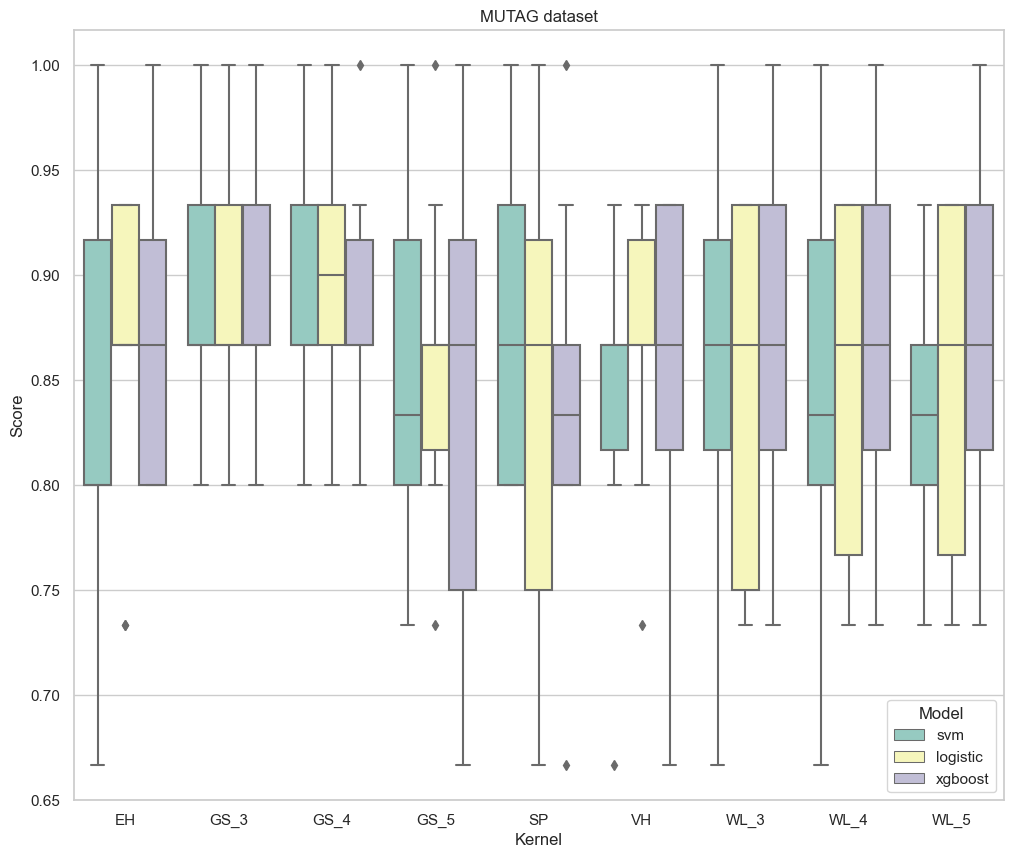

In [7]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))
ax = sns.boxplot(x="Kernel", y="Score", hue="Model", data=MUTAG_cv, palette="Set3")
ax.set_title("MUTAG dataset")
plt.show()

In [8]:
MUTAG_cv_median = MUTAG_cv.groupby(['Kernel', 'Model']).median().reset_index().sort_values(by='Kernel')

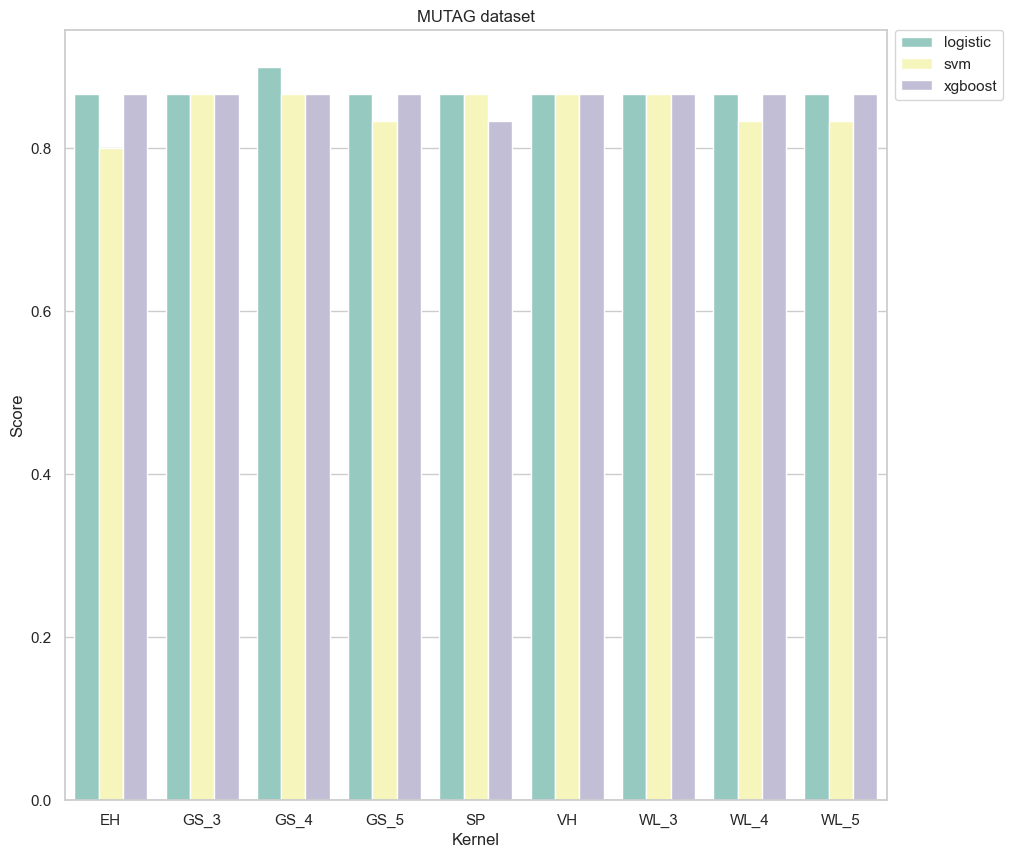

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10.6, 10))
ax = sns.barplot(x="Kernel", y="Score", hue="Model", data=MUTAG_cv_median, palette="Set3")
ax.set_title("MUTAG dataset")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [10]:
AIDS = Dataset("AIDS")

In [11]:
AIDS_cv = get_cv_dataframe(kernels, models, AIDS)

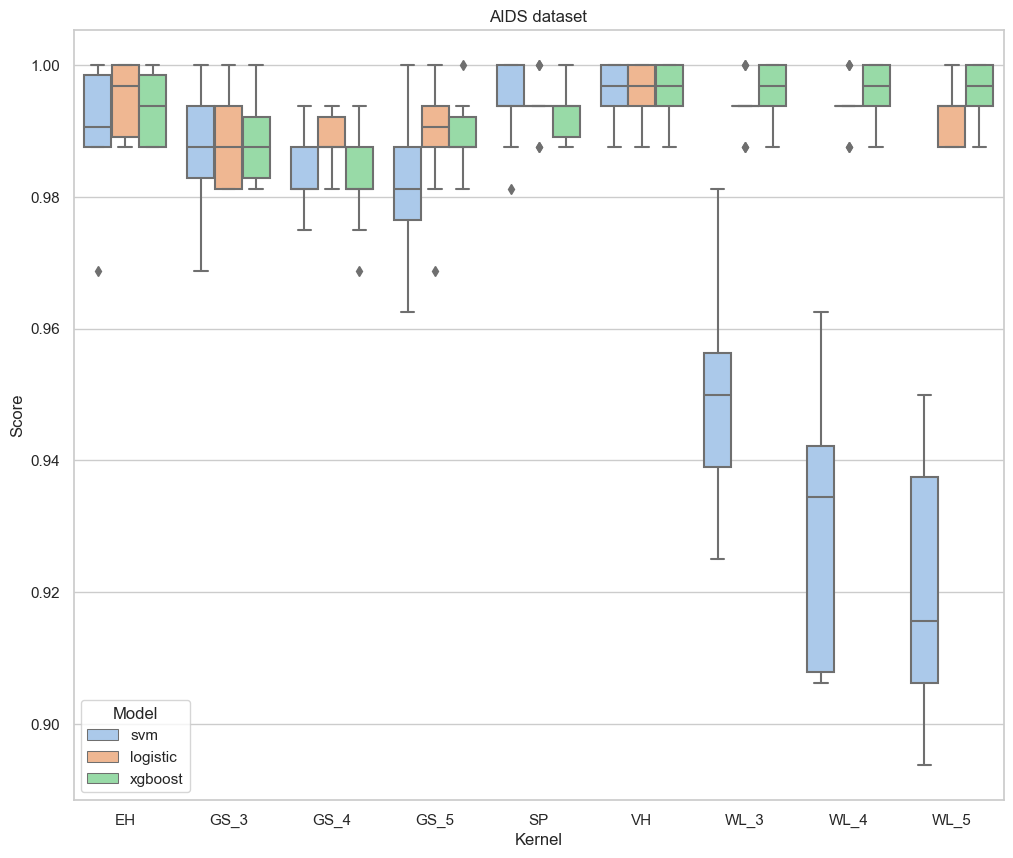

In [12]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))
ax = sns.boxplot(x="Kernel", y="Score", hue="Model", data=AIDS_cv, palette="pastel")
ax.set_title("AIDS dataset")
plt.show()

In [13]:
AIDS_cv_median = AIDS_cv.groupby(['Kernel', 'Model']).median().reset_index().sort_values(by='Kernel')

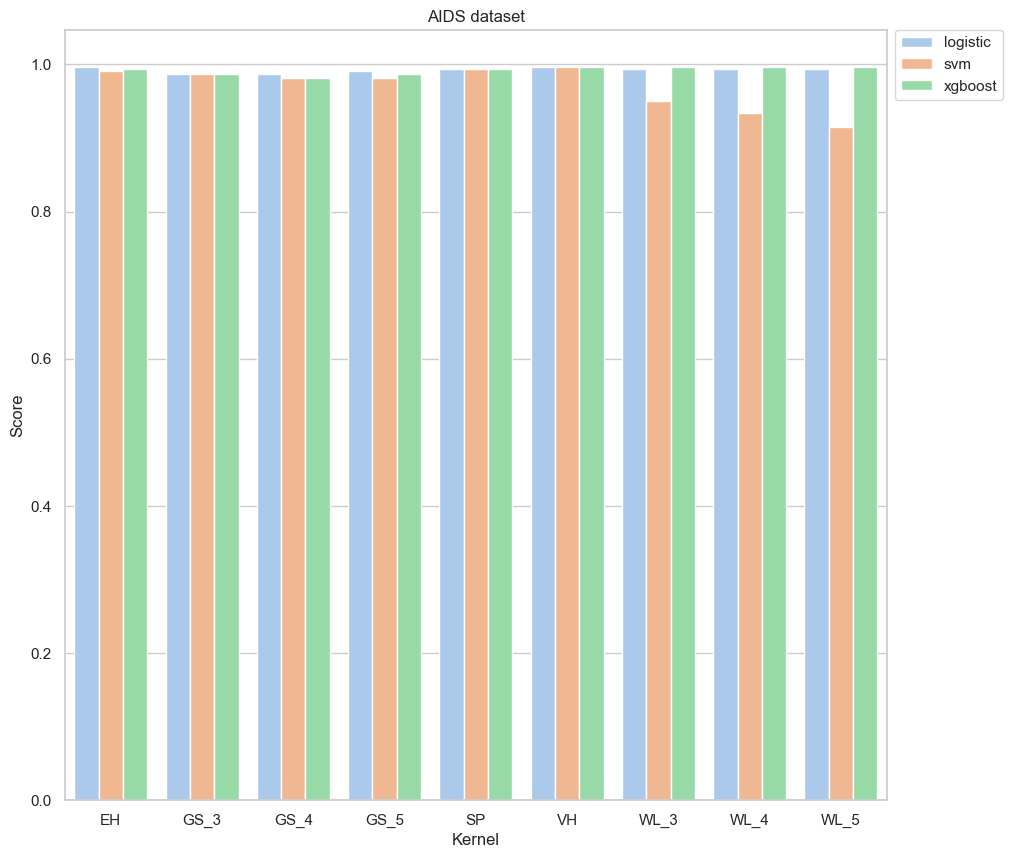

In [15]:
# use seaborn to plot barplot for all kernels and all models for MUTAG dataset
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10.6, 10))
ax = sns.barplot(x="Kernel", y="Score", hue="Model", data=AIDS_cv_median, palette="pastel")
ax.set_title("AIDS dataset")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()